# Kernel density estimation

What happens during kernel density estimation?
First we take the implemenation from scipy and then we try to reconstruct it step by step.

## SciPy implementation

In [1]:
%matplotlib inline
import scipy as scp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16, 9)})

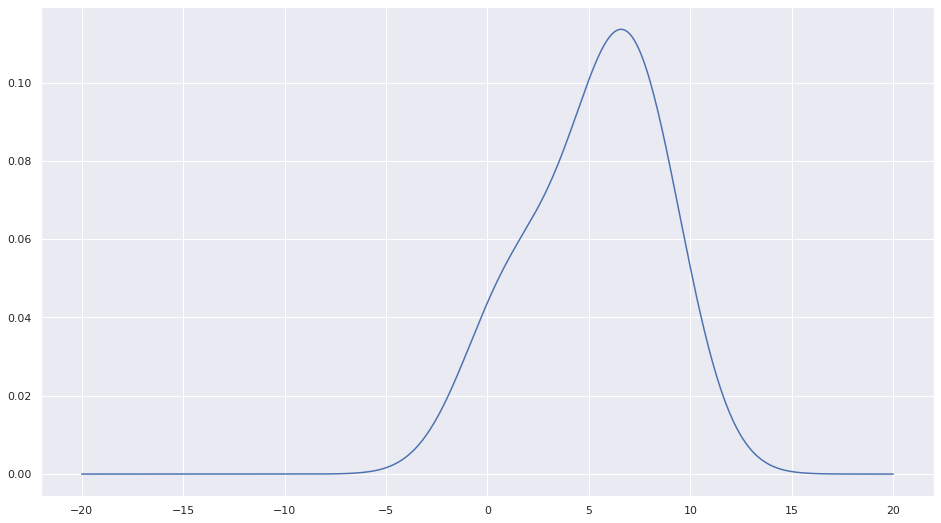

In [2]:
sample_points = [1, 5, 7, 8]
sns.lineplot(
    x=np.linspace(-20, 20, 401),
    y=scp.stats.gaussian_kde(sample_points, bw_method='scott')(np.linspace(-20, 20, 401)),
)

## What happens under the hood?

Its purpose is to estimate a smooth density function given some discrete points. 

Given:
 * data points $ x_1, x_2, \dots , x_n $ 
 * some smoothing parameter $ h $ ( called bandwidth )
 
$ e_h(x) = \frac 1 n \sum_{i = 1}^{n} k_h(x - x_i) $
 
Where $ e_h $ is the estimate and $ k_h $ is the kernel that is used for it.

$ k_h(x) = \frac 1 h k(\frac {x - x_i} {h})$

So now we need to make two choices:
 * a bandwidth parameter $h$
 * a kernel function $k(x)$

The kernel function will be the gaussian normal distribution for $ \sigma = 1 $

$ N_{\mu, \sigma}(x) = \frac 1 {\sigma \sqrt{ 2 \pi }} \exp(- \frac 1 2 (\frac {x - \mu} {\sigma} ) ^2 ) $

So if we choose $k(x) = N_{\mu = 0, \sigma = 0}(x) $ then $k_h(x - x_i) = N_{\mu=x_i, \sigma=h}(x) $ is the kernel with standard deviation $h$ and expectation value $ x_i $. 

So let us look at different values of $ h $ given $x_1=1$. 

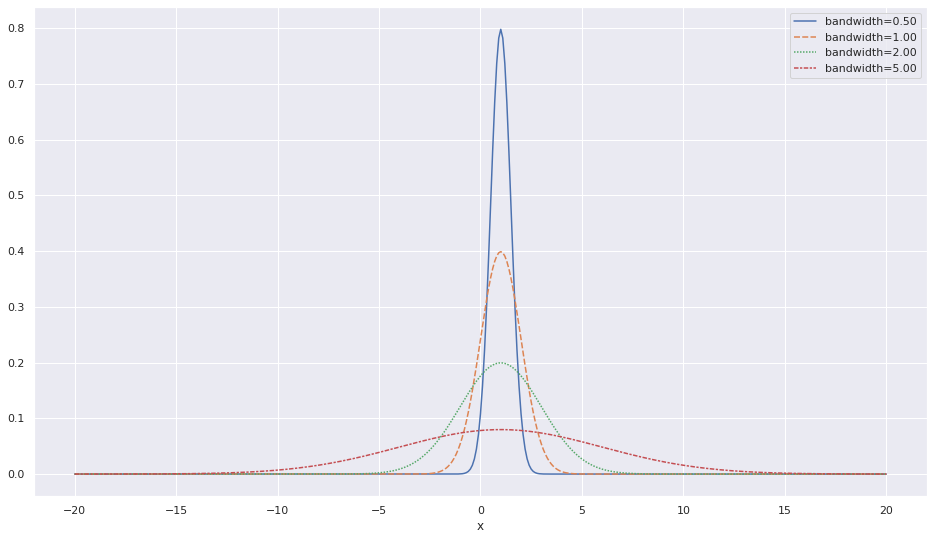

In [3]:
sns.lineplot(
    data=pd.DataFrame.from_dict(dict(
        **{
            'bandwidth=%.2f' % bandwidth:
                1. / bandwidth * scp.stats.norm.pdf([(sample - sample_points[0]) / bandwidth for sample in np.linspace(-20, 20, 401)])
            for bandwidth in [.5, 1., 2., 5.]
        },
        **{'x': np.linspace(-20, 20, 401)}
    )).set_index('x')
)


Now we look into the kernel estimations together in one plot. Therefore we fix one bandwidth to be 2.

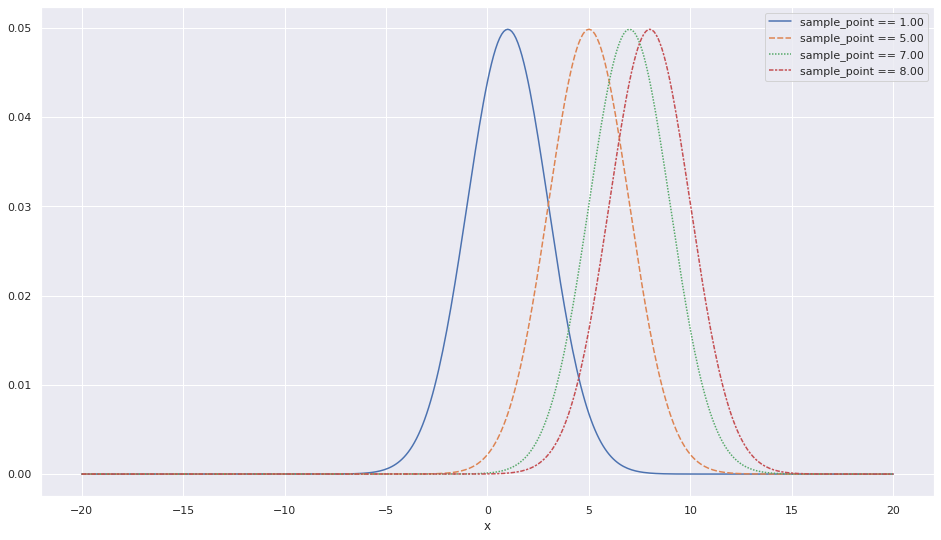

In [4]:
bandwidth = 2.

sns.lineplot(
    data=pd.DataFrame.from_dict(dict(
        **{
            'sample_point == %.2f' % sample_point:
                1. / (bandwidth * len(sample_points))  * scp.stats.norm.pdf([(sample - sample_point) / bandwidth for sample in np.linspace(-20, 20, 401)])
            for sample_point in sample_points
        },
        **{'x': np.linspace(-20, 20, 401)}
    )).set_index('x')
)


Now we have all kernels:

$k_h(x - x_i) $ for all $x_i$

The only thing is to combine them:

$ e_h(x) = \frac 1 {n h}\sum_{i = 1}^{n} k_h(\frac {x - x_i} { h }) $


Text(0.5, 1.0, 'bandwidth == 2.00')

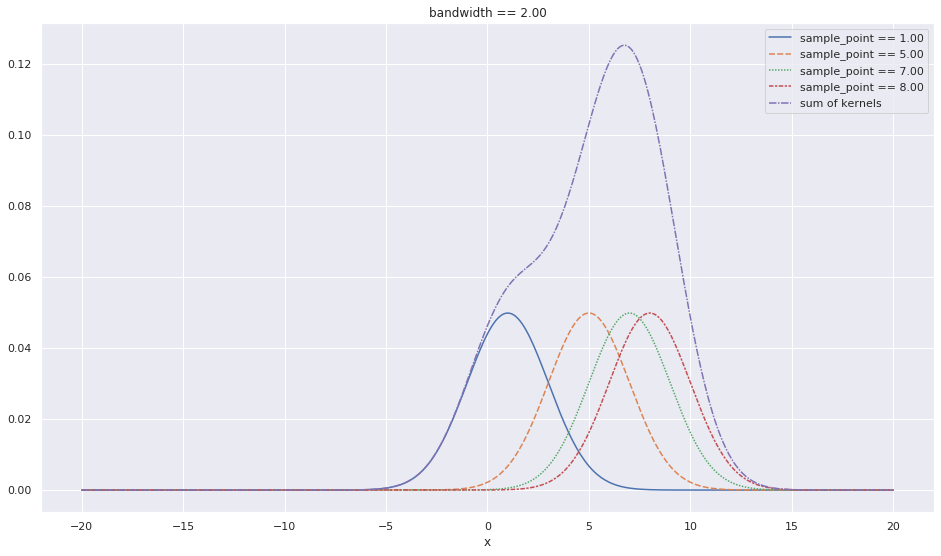

In [5]:
bandwidth = 2.

df = pd.DataFrame.from_dict(dict(
        **{
            'sample_point == %.2f' % sample_point:
                1. / (bandwidth * len(sample_points)) * scp.stats.norm.pdf([(sample - sample_point) / bandwidth for sample in np.linspace(-20, 20, 401)])
            for sample_point in sample_points
        },
        **{'x': np.linspace(-20, 20, 401)}
    )).set_index('x')

df['sum of kernels'] = df.sum(axis=1)

sns.lineplot(data=df).set_title('bandwidth == %.2f' % bandwidth)


Now everything is fixed except the bandwidth parameter $h$. So let us take a look at different bandwidth examples:

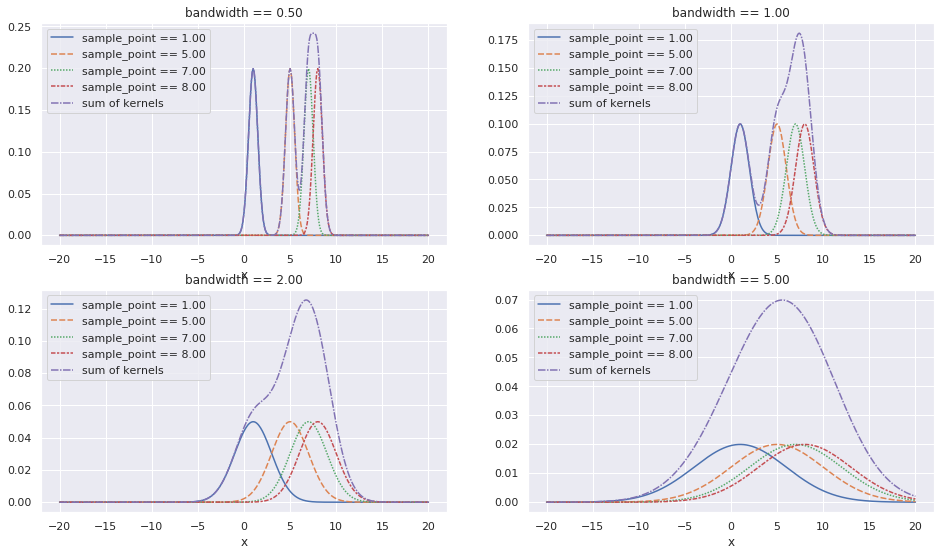

In [6]:
fig, axes = plt.subplots(2, 2)

for bandwidth, ax in zip([.5, 1., 2., 5.], axes.flatten()):

    df = pd.DataFrame.from_dict(dict(
            **{
                'sample_point == %.2f' % sample_point:
                    1. / (bandwidth * len(sample_points)) * scp.stats.norm.pdf([(sample - sample_point) / bandwidth for sample in np.linspace(-20, 20, 401)])
                for sample_point in sample_points
            },
            **{'x': np.linspace(-20, 20, 401)}
        )).set_index('x')

    df['sum of kernels'] = df.sum(axis=1)

    sns.lineplot(data=df, ax=ax).set_title('bandwidth == %.2f' % bandwidth)


So what is the optimal parameter for $h$ ? 

There is no wright and wrong, but scipy uses:

    n**(-1./(d+4))
    
which is 

$ \frac 1 { \sqrt[d + 4]{n} } $

where $n$ is the number of data points and $d$ is the dimension of the points.


Text(0.5, 1.0, 'bandwidth == 0.76')

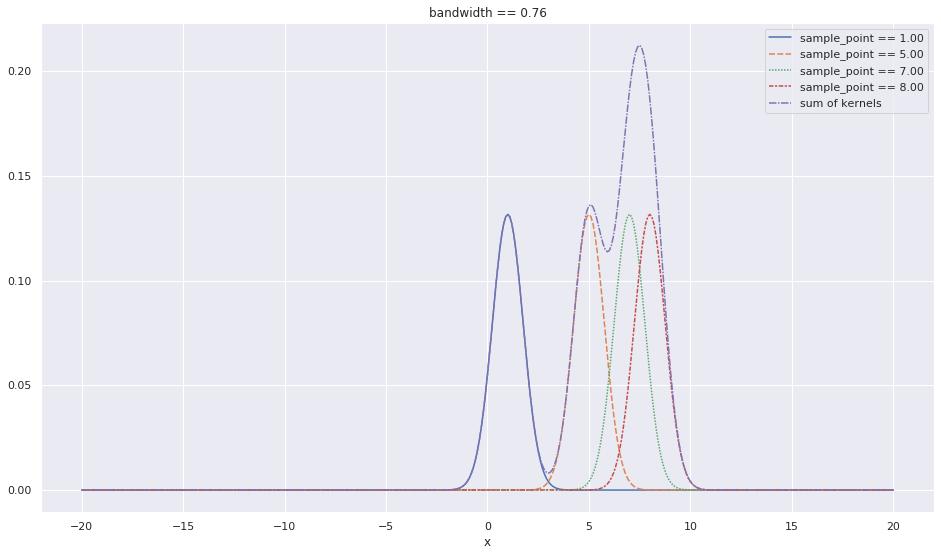

In [7]:
bandwidth = len(sample_points) ** (-1. / 5)
# bandwidth = 2.5
df = pd.DataFrame.from_dict(dict(
        **{
            'sample_point == %.2f' % sample_point:
                1. / (bandwidth * len(sample_points)) * scp.stats.norm.pdf([(sample - sample_point) / bandwidth for sample in np.linspace(-20, 20, 401)])
            for sample_point in sample_points
        },
        **{'x': np.linspace(-20, 20, 401)}
    )).set_index('x')

df['sum of kernels'] = df.sum(axis=1)

sns.lineplot(data=df).set_title('bandwidth == %.2f' % bandwidth)
